NameError: name 'pd' is not defined

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from keras.utils.vis_utils import plot_model


In [24]:
print("Hello world")

Hello world


In [43]:
df = pd.read_csv("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/meta.csv")
print(df.iloc[0])
y, sr = librosa.load("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/audio/"+df.iloc[[0]])
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

filename\tscene_label\tidentifier\tsource_label    audio/airport-lisbon-1000-40000-a.wav\tairport...
Name: 0, dtype: object


TypeError: Invalid file:      filename\tscene_label\tidentifier\tsource_label
0  D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban...

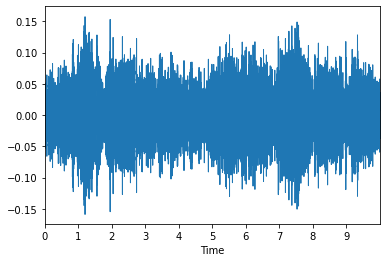

In [26]:
y, _ = librosa.effects.trim(y)
librosa.display.waveplot(y, sr=sr);


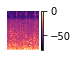

In [10]:
plt.interactive(False)
fig = plt.figure(figsize=[0.72,0.72])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel');
plt.colorbar();
# filename  = Path('D:\8th-sem\Major-Project\Dataset\img' + "name" + '.jpg')
plt.savefig("filename.jpg",dpi=400, bbox_inches='tight',pad_inches=0)

In [14]:
# TO GENERATE SPECTROGRAMS 
def generate_spectrogram(audioFile):
    y, sr = librosa.load("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/"+audioFile[0]+'/'+audioFile[1])
    y, _ = librosa.effects.trim(y)
    plt.interactive(False)
    # clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig("D:/8th-sem/Major-Project/Dataset/img/"+audioFile[1].split('.')[0], dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')

In [13]:
df = pd.read_csv("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/new_meta.csv")
# df.iloc[100][0].split('.')[0]

In [16]:
for i in range (0,1395):
    generate_spectrogram(df.iloc[i][0].split('/'))

D:\Users\Adhyyan\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/audio/bus-lyon-1001-40001-a.wav'

In [20]:
model = Sequential()
#Block -1
model.add(Conv2D(64, (3, 3), input_shape=(431, 256, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

#Block -2
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# model.add(Dense(1000,activation='softmax'))

#Block -3
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

#Block -4 
model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(1, 1)))

model.add(AveragePooling2D(pool_size=(24, 1)))
# model.add(MaxPooling2D(pool_size=( 1,46)))
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='Adam',metrics=['accuracy'])
model.summary()
model.save('D:/8th-sem/Major-Project/Code')



Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 429, 254, 64)      640       
_________________________________________________________________
batch_normalization_144 (Bat (None, 429, 254, 64)      256       
_________________________________________________________________
activation_144 (Activation)  (None, 429, 254, 64)      0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 427, 252, 64)      36928     
_________________________________________________________________
batch_normalization_145 (Bat (None, 427, 252, 64)      256       
_________________________________________________________________
activation_145 (Activation)  (None, 427, 252, 64)      0         
_________________________________________________________________
average_pooling2d_80 (Averag (None, 213, 126, 64)    

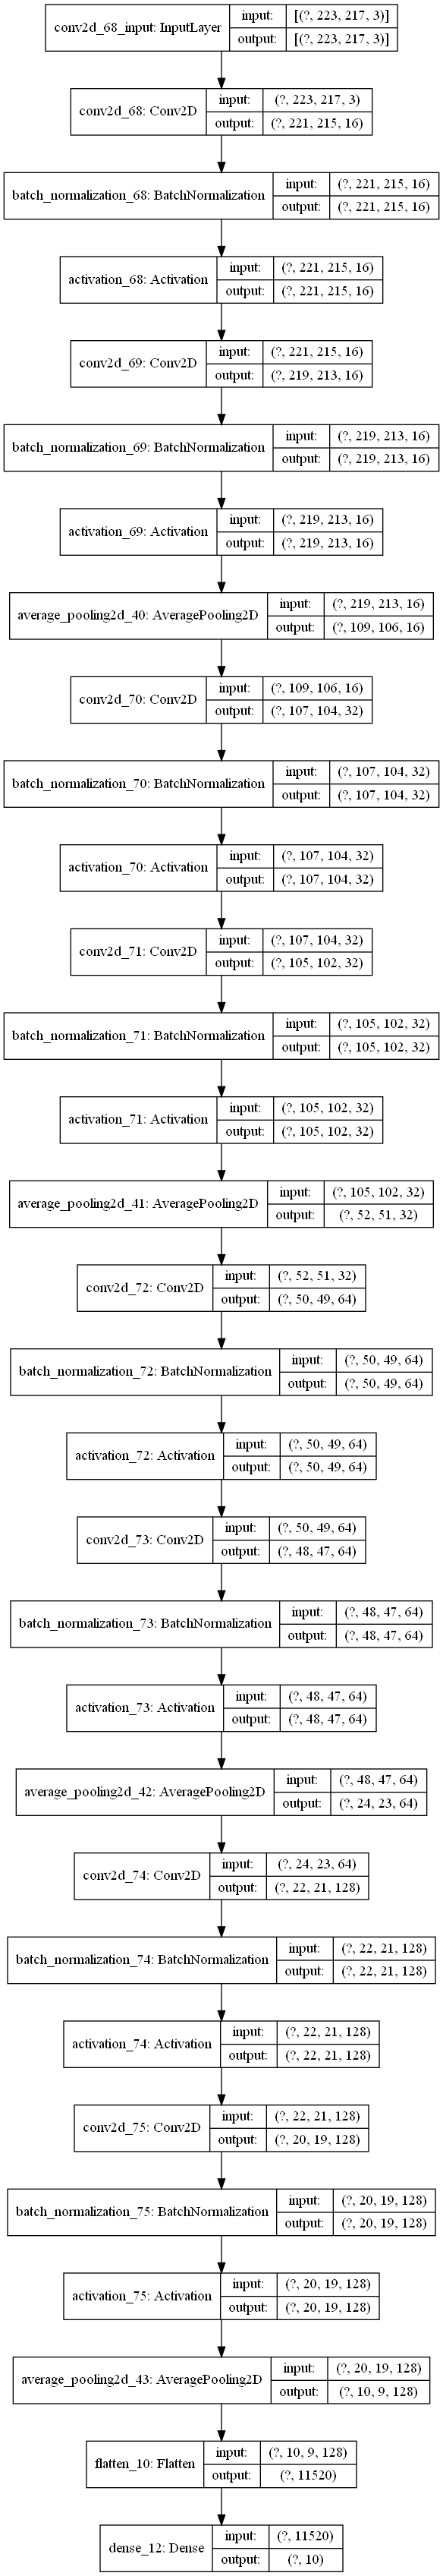

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)